In [55]:
import pandas as pd
import matplotlib.pyplot as plt   
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns

### Over View

#### I was tasked with predicting employee salaries from different employee characteristics ( or features). 
#### This will be done by using a simple supervised machine learning technique: linear regression. 
#### The goal is to build a simple model to determine how well Years Worked predicts an employee's Salary.

### Import the data salary.csv to a Jupyter Notebook.

In [3]:
df = pd.read_csv('salary.csv').dropna()

### EDA

In [49]:
df.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [50]:
df.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,50863.220098,2.931774,12.836257,7.046784,0.948558,0.964912,0.044834,2.130604,0.750487,2.526316,6.994152
std,12685.132358,4.794327,9.447040,6.419708,0.149524,0.184181,0.207142,0.819977,0.433153,1.126644,16.887552
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50096.000000,1.000000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60345.000000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


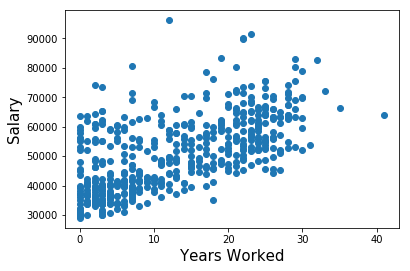

In [53]:
plt.scatter(df['yearsworked'],df['salary'])
plt.xlabel('Years Worked', fontsize = 15)
plt.ylabel('Salary', fontsize = 15)
plt.show()

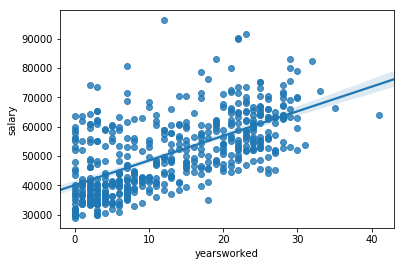

In [56]:
sns.regplot(x=df["yearsworked"], y=df["salary"])

### Splitting the data

#### I split my data by giving the training set 80% of the data and my test set got 20% of the data. 
#### I gave the training set 80% of the data so that I could better model the distribution.

In [21]:
y = df['salary']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=15)

### Creating the model

In [22]:
model = smf.ols(formula='salary ~ yearsworked', data=X_train).fit() 
model.params

Intercept      39985.294135
yearsworked      846.694353
dtype: float64

In [24]:
model_summary = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     292.5
Date:                Mon, 20 May 2019   Prob (F-statistic):           7.85e-50
Time:                        10:17:08   Log-Likelihood:                -4340.0
No. Observations:                 410   AIC:                             8684.
Df Residuals:                     408   BIC:                             8692.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.999e+04    797.226     50.156      

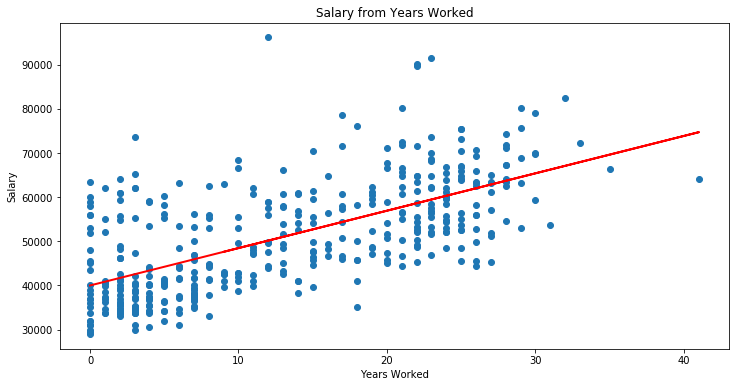

In [27]:
# Predict values
salary_predict = model.predict()

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(X_train['yearsworked'], X_train['salary'], 'o')           # scatter plot showing actual data
plt.plot(X_train['yearsworked'], salary_predict, 'r', linewidth=2)   # regression line
plt.xlabel('Years Worked')
plt.ylabel('Salary')
plt.title('Salary from Years Worked')

plt.show()

## Question 1

### Does the model significantly predict the dependent variable? Report the amount of variance explained (R^2) and significance value (p) to support your answer.

#### Yes the model predicts the dependent variable, I say this becaues the variance (R^2) is 0.418 and the higher the variance(R^2) the better the model fits. The p -value is 0.000 and as we know the lower the p-value the more significant the variable is.

### What percentage of the variance in employees’ salaries is accounted for by the number of years they have worked?

#### 41.8%

## Question 2

### What does the unstandardized coefficient (B or 'coef' in statsmodels) tell you about the relationship between Years Worked and Salary?

#### The relationship between Years Worked and Salary is that as the years worked increae by one unit, the salary increase by 846.694353.

## Question 3

### What do the 95% confidence intervals [0.025, 0.975] mean?

#### The 95% confidence interval is a range of values that we can be 95% certain contains the true mean of given data.

## Question 4

### Calculate the expected salary for someone with 12 years’ work experience.

####  The calculation that I use is 39117.437006 + 879.678668 * yearsworked
#### 39985.294135 + 846.694353 * 12 = 50 145,626335

In [28]:
new_X = 12
model.predict({"yearsworked": new_X})

0    50145.62637
dtype: float64

## Question 5

### Calculate the expected salary for someone with 80 years’ work experience. Are there any problems with this prediction? If so, what are they?

#### 39985.294135 + 846.694353 * 80 = 107720.842371
#### The prediction is fine but not many people if any at all will work for 80 years of their lives.

In [29]:
new_X = 80
model.predict({"yearsworked": new_X})

0    107720.842371
dtype: float64

# Question 6

## We have only looked at the number of years an employee has worked. What other employee characteristics might influence their salary?

#### Year rank, position, market, degree, gender

In [30]:
data = pd.read_csv('salary.csv')
data.corr()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.000000,0.119989,0.623589,0.610706,0.407214,0.044554,0.167137,0.702122,0.361564,-0.499316,-0.069630
exprior,0.119989,1.000000,-0.246549,-0.066403,-0.035041,-0.049373,0.264804,0.116596,0.046558,-0.048315,0.132380
yearsworked,0.623589,-0.246549,1.000000,0.813471,-0.070896,0.028421,-0.040490,0.746736,0.278963,-0.261379,0.055468
yearsrank,0.610706,-0.066403,0.813471,1.000000,-0.026975,0.006516,0.007036,0.485210,0.237787,-0.263953,0.035632
market,0.407214,-0.035041,-0.070896,-0.026975,1.000000,0.036408,0.021692,-0.013358,0.181201,-0.223827,-0.167068
degree,0.044554,-0.049373,0.028421,0.006516,0.036408,1.000000,-0.214717,0.043680,0.061611,-0.098424,0.029311
otherqual,0.167137,0.264804,-0.040490,0.007036,0.021692,-0.214717,1.000000,0.160311,0.015833,-0.076623,-0.017639
position,0.702122,0.116596,0.746736,0.485210,-0.013358,0.043680,0.160311,1.000000,0.318129,-0.288812,0.029751
male,0.361564,0.046558,0.278963,0.237787,0.181201,0.061611,0.015833,0.318129,1.000000,-0.128874,-0.622179
Field,-0.499316,-0.048315,-0.261379,-0.263953,-0.223827,-0.098424,-0.076623,-0.288812,-0.128874,1.000000,-0.000127


## Question 7

### How does your model compare when running it on the test set - what is the difference in the Root Mean Square Error (RMSE) between the training and test sets?

#### The training set RMSE is 9583.313134272033 and the test set RMSE is 11139.214430434042. 

In [57]:
prediction = test_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, prediction))

9583.313134272033

In [58]:
test_predictions = test_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, test_predictions))

11139.214430434042

In [43]:
test_model = smf.ols(formula='salary ~ yearsworked', data=X_test).fit() 
test_model.params

Intercept      40682.041575
yearsworked      794.246289
dtype: float64

In [46]:
test_model_summary = test_model.summary()
print(test_model_summary)

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     40.45
Date:                Mon, 20 May 2019   Prob (F-statistic):           5.93e-09
Time:                        11:33:48   Log-Likelihood:                -1105.9
No. Observations:                 103   AIC:                             2216.
Df Residuals:                     101   BIC:                             2221.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.068e+04   1902.137     21.388      